In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

##**Creating** **Dataset**

**Let's say we take the linear function as:   $y = 2x + 5$**

In [2]:
X = 20*np.array(list(set(np.random.random(size = 150).tolist())))

In [3]:
len(X)

150

In [4]:
noise = np.random.randn(len(X))
Y = 2*X + 5 + noise

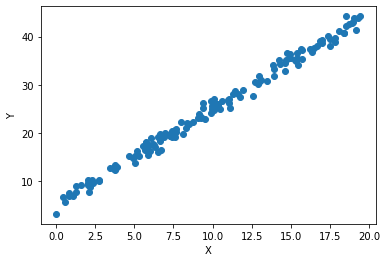

In [5]:
plt.plot(X,Y,ls="",marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
np.save("X.npy", X)
np.save("Y.npy", Y)



##**Initialising** **Parameters**

In [7]:
# Assume y = mx + c
m = np.random.rand()
c = np.random.rand()

print(m,c)

0.5126383130808708 0.36538253256489284


0.09957579053833365 0.8388527009794375

##**Linear Regression using |x -  x̂|³ as loss**

In [8]:
a = m
b = c

epochs = 200000
learning_rate = 5e-7
batch_size = 10

loss1 = []
l = 0

start = time.time()

for i in range(epochs):
  l = 0  
  for j in range(int(len(X)/batch_size)):
    da=0
    db=0
    for k in range(j*batch_size,(j+1)*batch_size):
      pred = a*X[k]+b
      if pred>Y[k]:
        l += (pred-Y[k])**3
        da += 3*((pred-Y[k])**2)*X[k]
        db += 3*((pred-Y[k])**2)
      else:
        l += (Y[k]-pred)**3
        da += -3*((pred-Y[k])**2)*X[k]
        db += -3*((pred-Y[k])**2)
    a = a - learning_rate*da
    b = b - learning_rate*db
  loss1.append(l)


print("Time taken - {}".format(time.time()-start))

Time taken - 129.81337213516235


In [9]:
a1 = a
b1 = b
print(a1,b1)

1.9852415448235405 5.154032743843985


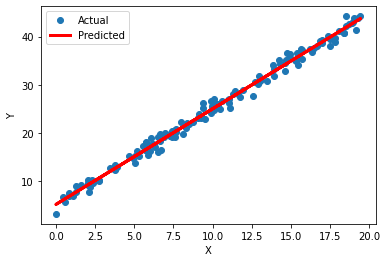

In [10]:
plt.plot(X,Y,ls="",marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X,a1*X+b1,color='red',linewidth=3)
plt.legend(['Actual','Predicted'])
plt.show()

##**Linear Regression using |x -  x̂| as loss**

In [11]:
a = m
b = c

epochs2 = 200000
learning_rate = 1e-5
batch_size = 10

loss2 = []
l = 0

start = time.time()

for i in range(epochs2):
  l = 0  
 
  for j in range(int(len(X)/batch_size)):
    da=0
    db=0
    for k in range(j*batch_size,(j+1)*batch_size):
      pred = a*X[k]+b
      if pred>Y[k]:
        l += (pred-Y[k])
        da += X[k]
        db += 1
      else:
        l += (Y[k]-pred)
        da += -X[k]
        db += -1
    a = a - learning_rate*da
    b = b - learning_rate*db
  loss2.append(l)


print("Time taken - {}".format(time.time()-start))

Time taken - 54.75385546684265


In [12]:
a2 = a
b2 = b
print(a2,b2)

1.9896859387314234 5.094822532570816


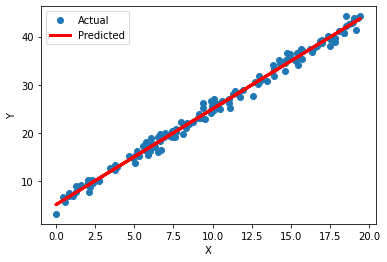

In [13]:
plt.plot(X,Y,ls="",marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X,a2*X+b2,color='red',linewidth=3)
plt.legend(['Actual','Predicted'])
plt.show()

##**Loss** **Graphs**

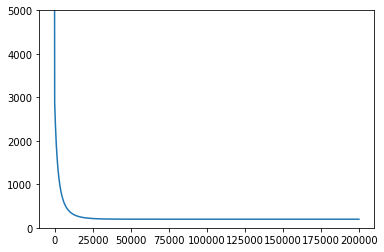

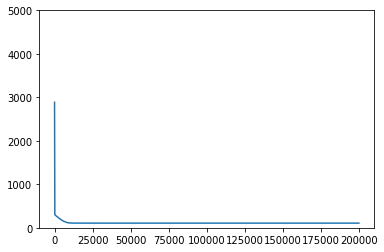

In [14]:
plt.plot(range(epochs),loss1)
plt.ylim((0,5000))
plt.show()
plt.plot(range(epochs2),loss2)
plt.ylim((0,5000))
plt.show()

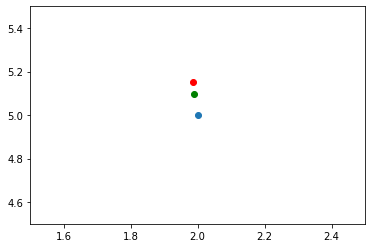

In [21]:
plt.plot(2,5,marker='o')
plt.plot(a1,b1,marker='o',color='red')
plt.plot(a2,b2,marker='o',color='green')
plt.xlim([1.5,2.5])
plt.ylim([4.5,5.5])
plt.show()